In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math

In [3]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [5]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

print(X[0:5,:])
print(Y[0:5,:])

(200, 2) (200, 1)
[[185.31763812  12.69396457]
 [259.92047498  11.86766377]
 [231.01357101  14.41424211]
 [175.3666449   11.72058651]
 [187.12086467  14.12973206]]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-03-14 11:02:55.145918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


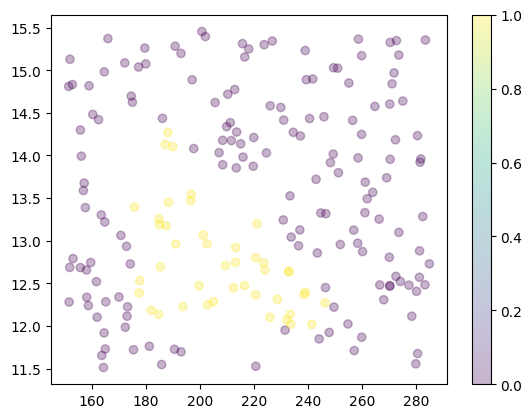

In [19]:
fig, ax = plt.subplots()
sc = ax.scatter(X[:,0], X[:,1], c=Y, cmap='viridis',alpha=0.3)

# Add a color bar
cbar = ax.figure.colorbar(sc, ax=ax)

In [26]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [27]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))


print(Xt[0:5])
print(Xt.shape, Yt.shape)

[[-0.8345551 -0.6528792]
 [ 1.0323051 -1.3851453]
 [ 0.3089391  0.8716251]
 [-1.0835688 -1.5154841]
 [-0.7894313  0.6194935]]
(200000, 2) (200000, 1)


In [29]:
# # plt.scatter(X_train[:,0], X_train[:,1], c=data, cmap='viridis')
# # add color bar with y_train

# fig, ax = plt.subplots()
# sc = ax.scatter(X[:,0], X[:,1], c=Yt, cmap='viridis')

# # Add a color bar
# cbar = ax.figure.colorbar(sc, ax=ax)


In [30]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [31]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.13426197 -0.14716476  0.9448204 ]
 [-0.5158966  -0.91607416 -1.0031177 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.9232637 ]
 [-0.06089091]
 [-0.7371315 ]] 
b2(1,): [0.]


In [32]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 10s 1ms/step - loss: 0.1950
Epoch 2/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.1348
Epoch 3/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.1239
Epoch 4/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.1118
Epoch 5/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0321
Epoch 6/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0153
Epoch 7/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0102
Epoch 8/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0072
Epoch 9/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0052
Epoch 10/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0037


In [33]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-1.0376426e+01 -1.7243809e+01  9.2033958e-03]
 [-2.2220863e-01 -1.4398490e+01 -8.2993927e+00]] 
b1: [-11.346214   -2.4863846 -10.44009  ]
W2:
 [[-43.63191 ]
 [ 30.995842]
 [-38.98145 ]] 
b2: [-8.758411]


In [38]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

# print values with 2 decimal places
predictionsRounds = np.round(predictions,3)
print("predictionsRounds = \n", predictionsRounds)

1/1 [==============================] - 0s 28ms/step
predictions = 
 [[9.7000313e-01]
 [1.5208739e-04]]
predictionsRounds = 
 [[0.97]
 [0.  ]]
